### Rosman Sales를 예측하라

##### Rossmann is Germany's second-largest drug store chain (after dm-drogerie markt), with other 3,000 stores in Europe

#### 1. 라이브러리 임포트 / 데이터 임포트

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1086-4A98

 C:\Users\jakethelazy\Desktop\github\Untitled Folder\my_kaggle 디렉터리

2017-08-05  오후 02:29    <DIR>          .
2017-08-05  오후 02:29    <DIR>          ..
2017-08-03  오후 06:34    <DIR>          .ipynb_checkpoints
2017-08-05  오후 02:29           163,053 0803_Rosman_sales.ipynb
2015-09-29  오후 03:48           317,611 sample_submission.csv
2017-08-03  오후 06:28            56,579 sample_submission.csv.zip
2015-09-29  오후 03:48            45,010 store.csv
2017-08-03  오후 06:28             8,529 store.csv.zip
2015-09-29  오후 03:48         1,427,425 test.csv
2017-08-03  오후 06:28           146,686 test.csv.zip
2015-09-29  오후 03:48        38,057,952 train.csv
2017-08-03  오후 06:28         5,931,096 train.csv.zip
               9개 파일          46,153,941 바이트
               3개 디렉터리  42,557,218,816 바이트 남음


#### 데이터 임포트 할때 타입 정해주는 것 알아봐야함

In [3]:
print ('loading')
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
sample_df = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')
print ('finish')

# dtype : Type name or dict of column -> type, default None
    #Data type for data or columns. E.g. {'a': np.float64, 'b': np.int32}
    #Use `str` or `object` to preserve and not interpret dtype

loading
finish


C:\python3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 칼럼 설명은 아래와 같음

Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [4]:
len(store_df.columns)

10

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [7]:
train_df[train_df['Store'] == 1]
# train_df 셋은 스토어별 날짜에 따른 기록으로 남겨져 있다.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
5575,1,7,2015-07-26,0,0,0,0,0,0
6690,1,6,2015-07-25,4364,500,1,0,0,0
7805,1,5,2015-07-24,3706,459,1,0,0,0
8920,1,4,2015-07-23,3769,503,1,0,0,0
10035,1,3,2015-07-22,3464,463,1,0,0,0


In [8]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [9]:
sample_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [10]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


 #### 1. 전처리 EDA : null 값 확인하기

In [11]:
'''명목 : store, storetype, assortment, promo2, promointerval
    연속 : competitoion distance, compe, compeyear, proweek, proyear'''

'명목 : store, storetype, assortment, promo2, promointerval\n    연속 : competitoion distance, compe, compeyear, proweek, proyear'

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### store_df에는 null 값이 존재함
- 명목 변수에서의 null값이며 이를 없애는 것은 데이터 손실을 불러 올 수 있으므로 그냥 두는것이 낫다고 봄

In [13]:
train_df[train_df.isnull() == True].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### train_df에는 null 값이 존재 하지 않음. 매우 깔끔함

### 1-1 store_df 확인하기

In [14]:
store_df.tail()
# 1115개의 로우를 가졌으며 이는 각각의 매장 번호랑 1대1로 매칭됨.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


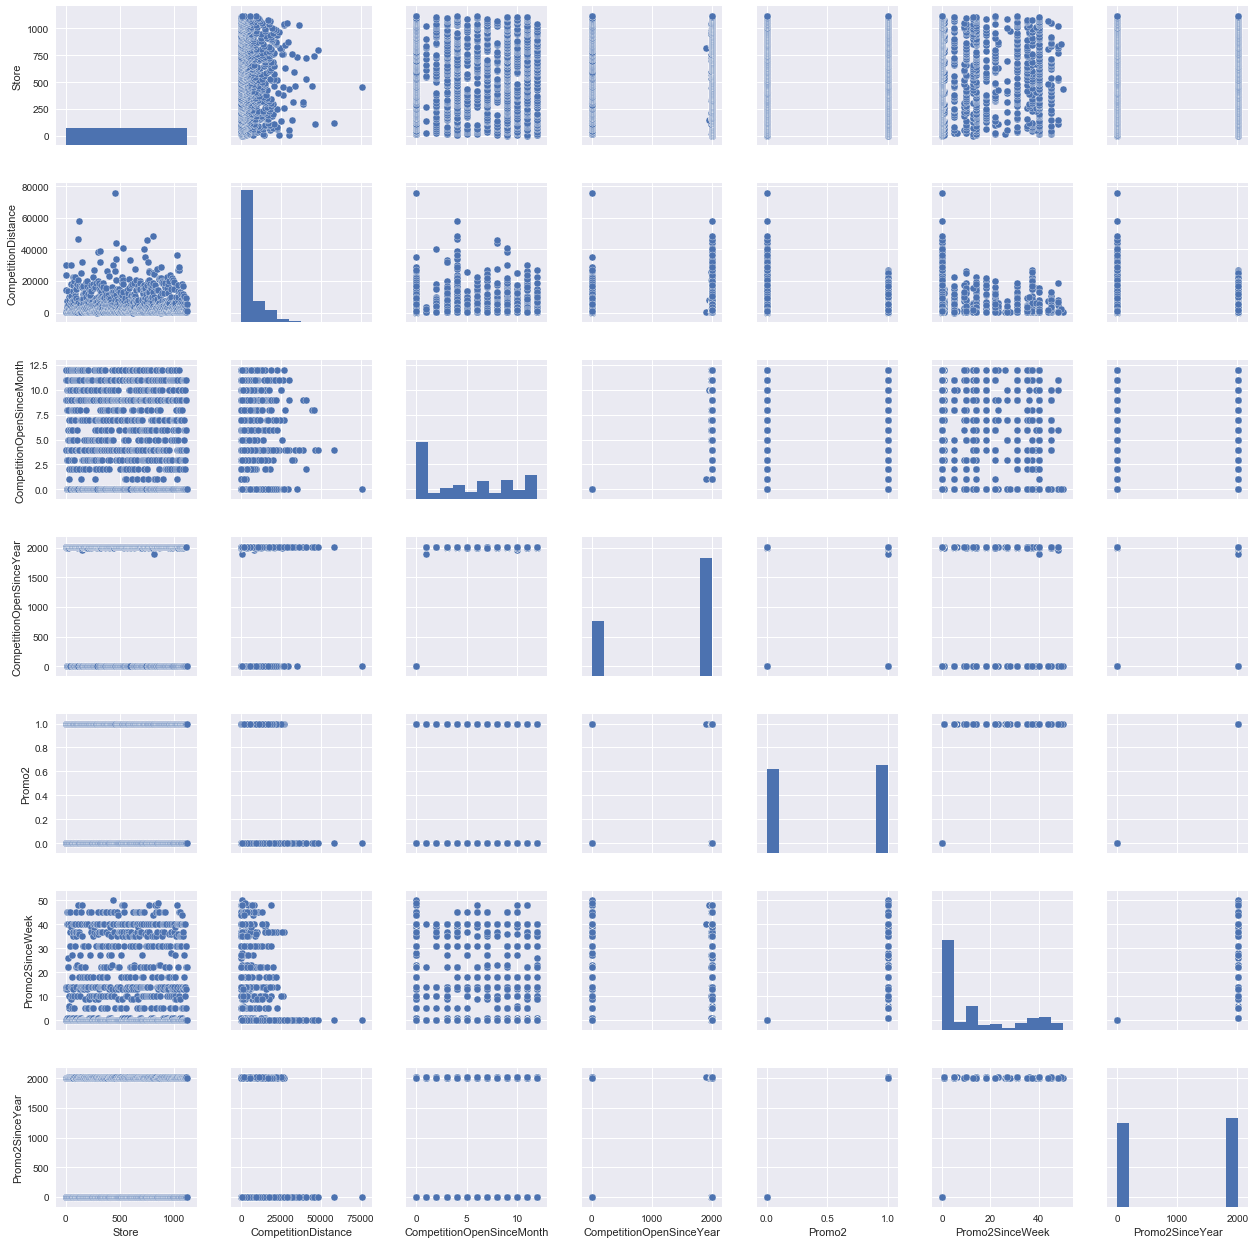

In [97]:
sns.pairplot(store_df)

In [15]:
store_df['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [16]:
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

#### storetype과 assortment가 무슨 차이가 있을까

In [17]:
type(store_df['CompetitionOpenSinceYear'].loc[0])

numpy.float64

In [18]:
type(store_df['Promo2SinceYear'].loc[0])

numpy.float64

#### 날짜 데이터는 전부 실수형으로 구성됨

#### promo2 : 두번째 프로모션이 진행중임을 뜻하는 것 같은데 since week이랑 since year을 모르겠음

In [19]:
store_df[store_df['Promo2'] == 1].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


### 경쟁점이 열린 년도와 프모2 참가한 연도를 확인해보자

In [92]:
store_df1 = store_df[store_df['CompetitionOpenSinceMonth'] != 0]
store_df2 = store_df1[store_df1['Promo2SinceWeek'] != 0]
# 연도 비교를 위해 0값이 있는 애들은 다 날려버림

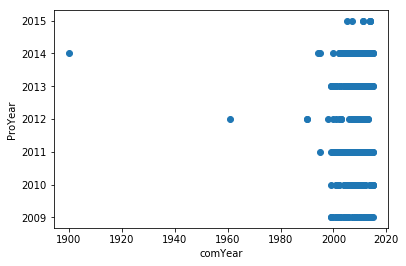

In [95]:
plt.scatter(store_df2['CompetitionOpenSinceYear'],store_df2['Promo2SinceYear'])
plt.xlabel('comYear')
plt.ylabel('ProYear')

In [85]:
store_df

(1115, 10)

#### 경쟁점 오픈일과 프로모션2 의 관계는? : 경쟁점이 오픈했으면 프로모션을 참여할 것이다.

- 참여한곳과 안한곳의 비율은 1대1 수준이며 이는 경쟁점 오픈과는 큰 연관이 없어보임.


In [48]:
store_df.fillna(0, inplace = True)

In [51]:
store_df['CompetitionOpenSinceMonth'].value_counts().sort_index(ascending = False)
# 경쟁점이 오픈한지 1년 이상 된 은 64개.
# 여기서의 인덱스 값들은 말 그대로 월을 뜻하는 듯.

12.0     64
11.0     92
10.0     61
9.0     125
8.0      39
7.0      67
6.0      50
5.0      44
4.0      94
3.0      70
2.0      41
1.0      14
0.0     354
Name: CompetitionOpenSinceMonth, dtype: int64

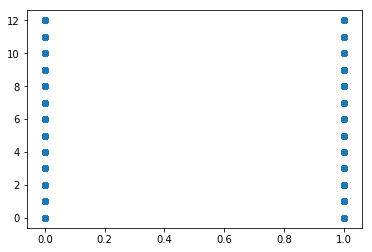

In [53]:
plt.scatter(store_df['Promo2'], store_df['CompetitionOpenSinceMonth'])
# 경쟁점이 없어도 프로모션을 진행하는 곳이 있다는 뜻.

In [56]:
print (0, store_df[store_df['Promo2'] == 0]['CompetitionOpenSinceMonth'].count())
print (1, store_df[store_df['Promo2'] == 1]['CompetitionOpenSinceMonth'].count())

0 544
1 571


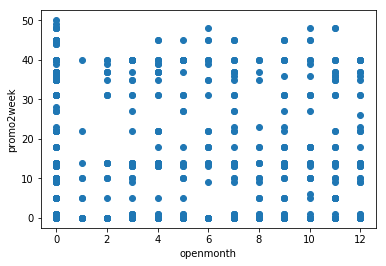

In [59]:
plt.scatter(store_df['CompetitionOpenSinceMonth'], store_df['Promo2SinceWeek'])
plt.xlabel('openmonth')
plt.ylabel('promo2week')

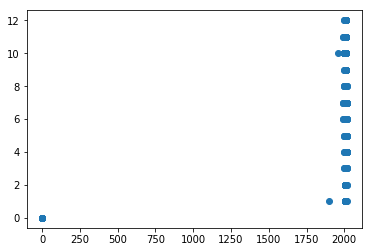

In [65]:
plt.scatter(store_df['CompetitionOpenSinceYear'], store_df['CompetitionOpenSinceMonth'])

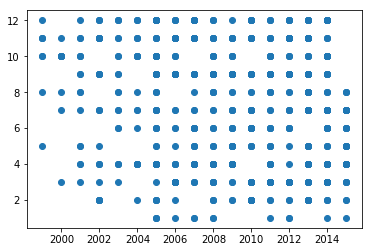

In [73]:
plt.scatter(store_df[store_df['CompetitionOpenSinceYear'] > 1998]['CompetitionOpenSinceYear'],
            store_df[store_df['CompetitionOpenSinceYear'] > 1998]['CompetitionOpenSinceMonth'])

In [71]:
store_df['CompetitionOpenSinceYear'].value_counts()
# 로스만 역사가 1900년도 부터 있는건가? 결값인가.

0.0       354
2013.0     83
2012.0     82
2014.0     70
2005.0     62
2010.0     55
2008.0     54
2009.0     54
2011.0     54
2007.0     48
2006.0     47
2015.0     38
2002.0     27
2004.0     22
2003.0     19
2001.0     16
2000.0     10
1999.0      8
1990.0      5
1995.0      2
1994.0      2
1961.0      1
1900.0      1
1998.0      1
Name: CompetitionOpenSinceYear, dtype: int64

In [20]:
store_df['CompetitionDistance'].value_counts().sort_values(ascending = False)

250.0      12
1200.0      9
350.0       8
50.0        8
190.0       8
150.0       7
330.0       7
90.0        7
180.0       7
340.0       6
110.0       6
1070.0      6
2640.0      6
140.0       6
540.0       6
100.0       5
1090.0      5
720.0       5
40.0        5
240.0       5
450.0       5
310.0       5
4030.0      5
210.0       5
300.0       5
420.0       5
120.0       5
290.0       5
70.0        5
550.0       4
           ..
21930.0     1
2540.0      1
12610.0     1
5080.0      1
4680.0      1
8400.0      1
2550.0      1
6910.0      1
5540.0      1
6630.0      1
5900.0      1
11470.0     1
3110.0      1
4570.0      1
12870.0     1
4590.0      1
14570.0     1
2230.0      1
6300.0      1
7780.0      1
5140.0      1
1970.0      1
40540.0     1
9990.0      1
27190.0     1
2820.0      1
13090.0     1
8040.0      1
9200.0      1
2780.0      1
Name: CompetitionDistance, Length: 654, dtype: int64

#### store_df 기초 통계 분석

In [21]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### sinceweek와 sinceyear 분석

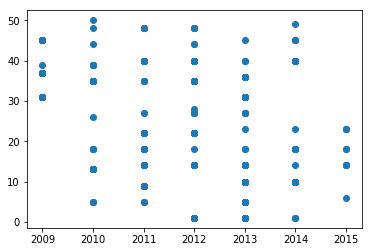

In [25]:
plt.scatter(store_df['Promo2SinceYear'], store_df['Promo2SinceWeek'])

In [30]:
store_df['Promo2SinceWeek'].value_counts().sort_index(ascending = False)
# sinceweek은 프로모션2가 시작한 주차를 뜻하는 듯함.

50.0     1
49.0     1
48.0     9
45.0    34
44.0     3
40.0    77
39.0     6
37.0    35
36.0    10
35.0    25
31.0    44
28.0     1
27.0    11
26.0     1
23.0     5
22.0    33
18.0    29
14.0    81
13.0    34
10.0    42
9.0     14
6.0      1
5.0     39
1.0     35
Name: Promo2SinceWeek, dtype: int64

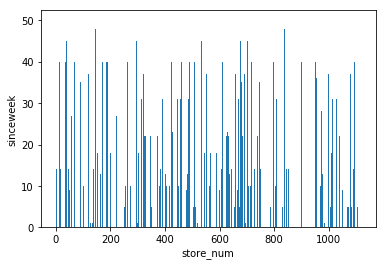

In [41]:
plt.bar(store_df['Store'], store_df['Promo2SinceWeek'], )
plt.ylabel('sinceweek')
plt.xlabel('store_num')

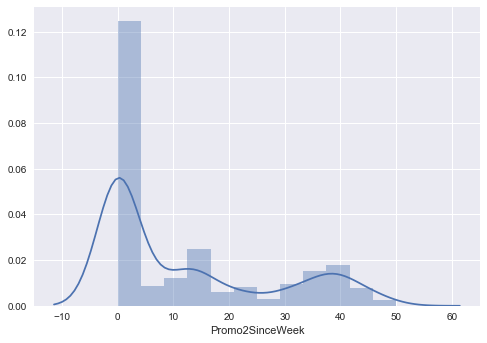

In [98]:
sns.distplot(store_df['Promo2SinceWeek'].dropna())

(array([  74.,   57.,  115.,   29.,   38.,   13.,   69.,  128.,   37.,   11.]),
 array([  1. ,   5.9,  10.8,  15.7,  20.6,  25.5,  30.4,  35.3,  40.2,
         45.1,  50. ]),
 <a list of 10 Patch objects>)

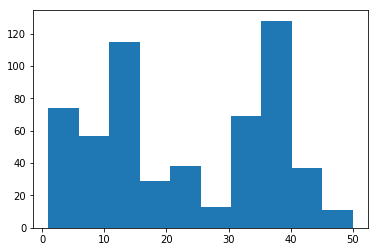

In [46]:
plt.hist(store_df['Promo2SinceWeek'].dropna())
# hist는 nan값이 있으면 안된다.

#### sinceyear과 sinceweek가 연관이 있다면 양의 상관관계가 나타나야함.


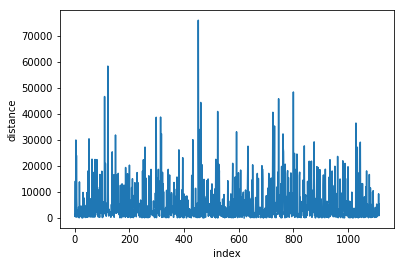

In [22]:
plt.plot(store_df['CompetitionDistance'])
plt.xlabel('index')
plt.ylabel('distance')

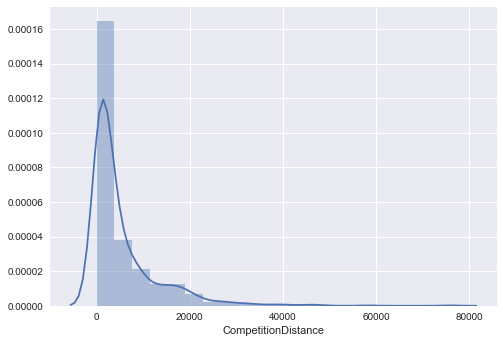

In [104]:
sns.distplot(store_df['CompetitionDistance'], bins = 20)

### store_df 1차 리뷰
- 데이터 중에 null 값이 많으나 이는 말 그대로 없는 정보 이므로 0으로 그대로 두는 것이 마땅함
- store데이터는 크게 경쟁점이 있는 곳, 그리고 promo2를 진행하는 여부 로 구분 지을 수 있을 듯 함
- salses에서 가장 큰 영향을 끼친다고 생각하는 것
    - 1. 경쟁점과의 거리
    - 2. 프로모션2 진행여부
    
### store_df 2차 리뷰
- 스토어 타입별 구분이 지어지나 a,b가 압도적으로 많다.
스토어 타입은
a    602
d    348
c    148
b     17

assrotment는
a    593
c    513
b      9

경쟁점 오픈 년도에 1900이라는
결측값이 존재함
1968도 있음

프로모2
0 544
1 571
거의 1대1 비율

경쟁점 오픈 월은
절대 값 월을 뜻하고

프로모의 week는
1년, 52주 중 언제 부터 했는지를 뜻함.

굳이 이 두개를 이렇게 다르게 표현하는 이유를 모르겠음.
계절적 표현인가?
독일의 계절적 요소??



# train_df 확인해보기

In [116]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [112]:
# 칼럼 확인학
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [111]:
# 칼럼별 nan값 확인 하기
for i in train_df.columns:
    print (i, train_df[i][train_df[i].isnull()==True].count())
# 없음

Store 0
DayOfWeek 0
Date 0
Sales 0
Customers 0
Open 0
Promo 0
StateHoliday 0
SchoolHoliday 0


In [114]:
# 칼럼 밸류값 형태 확인
for i in train_df.loc[1]:
    print (i, type(i))
# 날짜를 숫자로 변경해주는 작업이 필요로 함.

2 <class 'numpy.int64'>
5 <class 'numpy.int64'>
2015-07-31 <class 'str'>
6064 <class 'numpy.int64'>
625 <class 'numpy.int64'>
1 <class 'numpy.int64'>
1 <class 'numpy.int64'>
0 <class 'str'>
1 <class 'numpy.int64'>


In [119]:
# 전체 통계적 분석
train_df.describe()
# 이래서 처음에 임포트 할때 값을 지정해주는 듯.

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [121]:
# 칼럼별로 해보자
for i in train_df.columns:
    print (i, train_df[i].describe())
# 응 똑같아

Store count    1.017209e+06
mean     5.584297e+02
std      3.219087e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.580000e+02
75%      8.380000e+02
max      1.115000e+03
Name: Store, dtype: float64
DayOfWeek count    1.017209e+06
mean     3.998341e+00
std      1.997391e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DayOfWeek, dtype: float64
Date count        1017209
unique           942
top       2013-12-25
freq            1115
Name: Date, dtype: object
Sales count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
Customers count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64
Open count    1.017209e+06
me

In [122]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [132]:
train_df[train_df['Store'] == 1].count()
# store는 총 1200개 정도 있는데, 942개의 데이터를 가지고 있다.

Store            942
DayOfWeek        942
Date             942
Sales            942
Customers        942
Open             942
Promo            942
StateHoliday     942
SchoolHoliday    942
dtype: int64

In [135]:
train_df.sort_values(['Store', 'Date'])
# 13년 1월 1일부터 15월 7월 31일 까지의 정보가 있다.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1010520,1,7,2013-01-06,0,0,0,0,0,1
1009405,1,1,2013-01-07,7176,785,1,1,0,1
1008290,1,2,2013-01-08,5580,654,1,1,0,1
1007175,1,3,2013-01-09,5471,626,1,1,0,1
1006060,1,4,2013-01-10,4892,615,1,1,0,1


In [136]:
import re

In [137]:
date = '2013-01-08'

In [141]:
print (type(re.split(r'[-]',date)))

<class 'list'>


In [138]:
re.sub(r'[-]', '', date)

'20130108'

In [ ]:
str = 'What a nice weather macmath22@gmail.com, test@test.com mina@minas.net'
replaced = re.sub(r'[\w.-]+@[\w.-]+', r'test', str) # 이메일 패턴을 찾아서 test로 바꿈
print replaced